In [28]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
#File to load
cityData_path = "raw_data/city_data.csv"
rideData_path = "raw_data/ride_data.csv"

# Read the city csv and ride into Pandas DataFrame
cityData_df = pd.read_csv(cityData_path, encoding="utf-8")
cityData_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
rideData_df = pd.read_csv(rideData_path, encoding="utf-8")
rideData_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [9]:
# joine the city and ride dataframes

cityRideData_df = pd.merge(rideData_df, cityData_df, how = 'left', on='city')
cityRideData_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [50]:
# Create Grouped Data Frame 

grouped_cityRides_df = cityRideData_df.groupby(["city", "type"])

# calculate * Average Fare ($) Per City,  Total Number of Rides Per City * Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)

averageFareCity =  grouped_cityRides_df["fare"].mean()
totalRidesCity =   grouped_cityRides_df["ride_id"].count()
totalDriversCity = grouped_cityRides_df["driver_count"].sum()

rideCity_summary = pd.DataFrame({
                             "Average Fare" : averageFareCity,
                             "Total Riders" : totalRidesCity,
                             "Total Drivers": totalDriversCity
                            })

rideCity_summary = rideCity_summary[["Average Fare", "Total Riders", "Total Drivers"]].round(2)

rideCity_summary = rideCity_summary.reset_index()

rideCity_summary

,city,type,Average Fare,Total Riders,Total Drivers
0,Alvarezhaven,Urban,23.93,31,651
1,Alyssaberg,Urban,20.61,26,1742
2,Anitamouth,Suburban,37.32,9,144
3,Antoniomouth,Urban,23.62,22,462
4,Aprilchester,Urban,21.98,19,931
5,Arnoldview,Urban,25.11,31,1271
6,Campbellport,Suburban,33.71,15,390
7,Carrollbury,Suburban,36.61,10,40
8,Carrollfort,Urban,25.40,29,1595
9,Clarkstad,Suburban,31.05,12,252


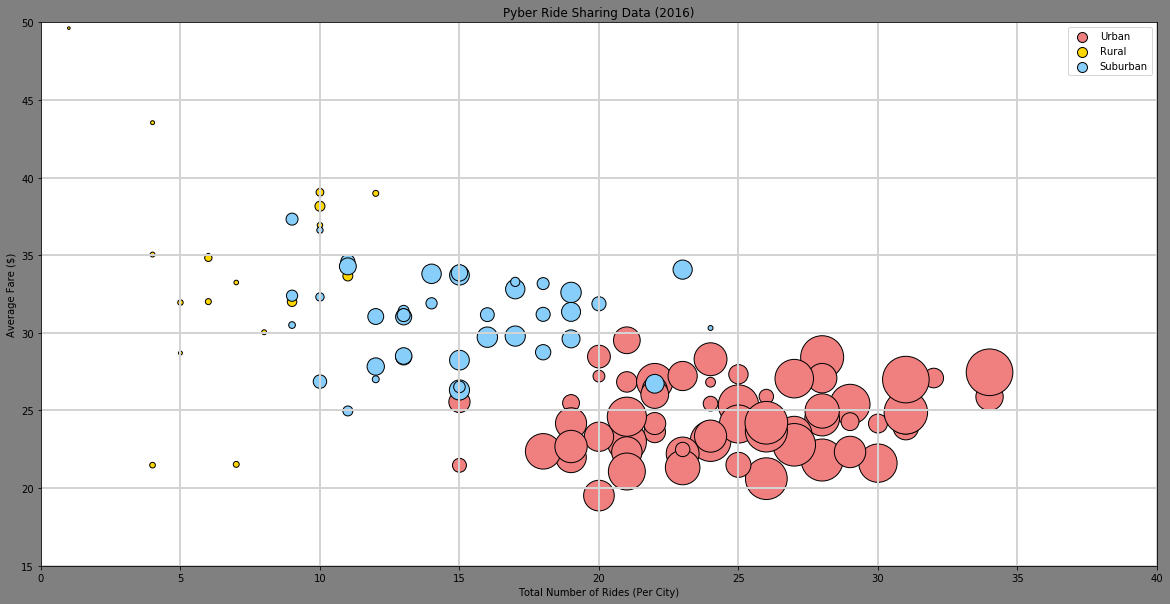

In [134]:
# Create scatter plot - bubble chart

plt.figure(figsize=(20,10))

   
x = rideCity_summary["Total Riders"][rideCity_summary["type"]  == "Urban" ]
y = rideCity_summary["Average Fare"][rideCity_summary["type"]  == "Urban" ]
area = rideCity_summary["Total Drivers"][rideCity_summary["type"]  == "Urban"]
    
plt.scatter(x,y, marker="o", c='lightcoral', label='Urban', edgecolors="black", s=area)

x = rideCity_summary["Total Riders"][rideCity_summary["type"]  == "Rural" ]
y = rideCity_summary["Average Fare"][rideCity_summary["type"]  == "Rural" ]
area = rideCity_summary["Total Drivers"][rideCity_summary["type"]  == "Rural"]
    
plt.scatter(x,y, marker="o", c='gold', label='Rural', edgecolors="black", s=area)

x = rideCity_summary["Total Riders"][rideCity_summary["type"]  == "Suburban" ]
y = rideCity_summary["Average Fare"][rideCity_summary["type"]  == "Suburban" ]
area = rideCity_summary["Total Drivers"][rideCity_summary["type"]  == "Suburban"]
    
plt.scatter(x,y, marker="o", c='lightskyblue', label='Suburban', edgecolors="black", s=area)


plt.ylim(15,50)
plt.xlim(0,40)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

lgd = plt.legend(loc='upper right', markerscale= 2, scatterpoints=1, fontsize=10)
lgd.legendHandles[0]._sizes = [100]
lgd.legendHandles[1]._sizes = [100]
lgd.legendHandles[2]._sizes = [100]

plt.grid(color='lightgrey', linestyle='-', linewidth=2)
plt.show()
       

In [111]:
grouped_cityType_df = cityRideData_df.groupby(["type"])

# calculate * Average Fare ($) Per City,  Total Number of Rides Per City * Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)

totalFareCity =  grouped_cityType_df["fare"].sum()
totalRidesCity =   grouped_cityType_df["ride_id"].count()
totalDriversCity = grouped_cityType_df["driver_count"].sum()

rideCityType_summary = pd.DataFrame({
                             "Total Fare" : totalFareCity,
                             "Total Riders" : totalRidesCity,
                             "Total Drivers": totalDriversCity
                            })

rideCityType_summary = rideCityType_summary[["Total Fare", "Total Riders", "Total Drivers"]].round(2)

rideCityType_summary = rideCityType_summary.reset_index()

rideCityType_summary

,type,Total Fare,Total Riders,Total Drivers
0,Rural,4255.09,125,727
1,Suburban,20335.69,657,9730
2,Urban,40078.34,1625,64501


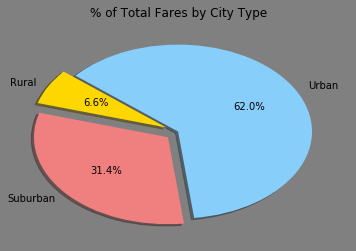

In [135]:
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
labels = rideCityType_summary["type"]
sizes  = rideCityType_summary["Total Fare"]
title = "% of Total Fares by City Type"
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(title)
plt.show()

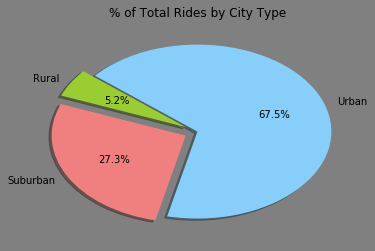

In [116]:
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
labels = rideCityType_summary["type"]
sizes  = rideCityType_summary["Total Riders"]
title = "% of Total Rides by City Type"
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(title)
plt.show()

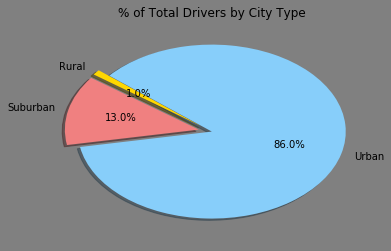

In [136]:
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
labels = rideCityType_summary["type"]
sizes  = rideCityType_summary["Total Drivers"]
title = "% of Total Drivers by City Type"
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(title)
plt.show()